---
<div>
    <img src='https://upload.wikimedia.org/wikipedia/commons/6/6f/Logo-udla.jpg' with='50' height='15'align=center> 
</div>

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---

<h2><font color='darkcyan'>Examen Machine Learning I</font></h2>
<h3><font color='IndianRed'>Problema 3: Detección de anomalías</font></h3>

<p1><b><h3>Nombre: Didimo Escobar</h3></b></p1>

<p1><b>GitHub: https://github.com/descobardos/MG-Data-Science/tree/main/Machine%20Learning%20I</b></p1>

<p2><b>Email: descobardos@gmail.com</b></p2>
<br></br>

> El objetivo y espiritu de este proceso es evaluar los contenidos aprendidos durante este bimestre en Machine Learning I, que aborda el aprendizaje no supervisado.
>


#### Problema 3: Detección de anomalías

<p style='text-align: justify;'>Basado en un dataset que contiene mediciones del consumo de energía eléctrica en un hogar con una tasa de muestreo de un minuto durante un período de casi 4 años. Están disponibles diferentes magnitudes eléctricas y algunos valores de submedición.</p>

Dataset: https://patricioaraneda.cl/public_data/household_power_consumption.txt

<p>Información de atributos:</p>
<ol>
<li><b>dt:</b> Fecha en formato dd/mm/aaaa hh:mm:ss</li>
<li><b>Global_active_power:</b> potencia activa global promediada por minuto del hogar (en kilovatios)</li>
<li><b>Global_reactive_power:</b> potencia reactiva global media por minuto del hogar (en kilovatios)</li>
<li><b>voltage:</b> voltaje medio por minuto (en voltios)</li>
<li><b>Global_intensity:</b> intensidad de corriente promediada por minutos global del hogar (en amperios)</li>
<li><b>Sub_metering_1:</b> submedición de energía nº 1 (en vatios-hora de energía activa). Corresponde a la cocina, que contiene principalmente un lavavajillas, un horno y un microondas (las placas no son eléctricas sino de gas).</li>
<li><b>Sub_metering_2:</b> submedición de energía nº 2 (en vatios-hora de energía activa). Corresponde al lavadero, que contiene una lavadora, una secadora, un frigorífico y una luz.</li>
<li><b>Sub_metering_3:</b> submedición de energía nº 3 (en vatios-hora de energía activa). Corresponde a un calentador de agua eléctrico y a un aire acondicionado.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# settings para pandas
pd.set_option('display.max_columns', 500)

# settings para 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# se define como objeto el archivo desde url no GitHub
url = 'https://www.patricioaraneda.cl/public_data/household_power_consumption.txt'

In [3]:
power = pd.read_csv(url, encoding='utf-8', sep=';', low_memory=False)

### Carga de datos en un objeto llamado 'df'

In [4]:
df = power.copy()

In [5]:
#primeros cinco registros
df.head(n=5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
#ultimos cinco registros
df.tail(n=5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


### ¿Cuantos registros tiene el dataset?

In [7]:
df.shape

(2075259, 9)

In [8]:
# se identifica la forma del dataset
print(f'La cantidad de columnas del dataset es de: \033[94m {df.shape[1]} \033[0m')

La cantidad de columnas del dataset es de:  9 


In [9]:
# se identifica la forma del dataset
print(f'La cantidad de filas del dataset es de: \033[94m {df.shape[0]} \033[0m')

La cantidad de filas del dataset es de:  2075259 


In [10]:
print(f'La cantidad de valores NaN es de: \033[94m{df.isnull().sum().sum()}\033[0m en todo el dataset')

La cantidad de valores NaN es de: 25979 en todo el dataset


In [11]:
# solamente datos unicos
df.nunique()

Date                     1442
Time                     1440
Global_active_power      4187
Global_reactive_power     533
Voltage                  2838
Global_intensity          222
Sub_metering_1             89
Sub_metering_2             82
Sub_metering_3             32
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Verificación de valores NaN como de caracteres especiales

In [13]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [14]:
# el dataframe posee NaN en su proceso, solo una variable posee un 1.25% de datos faltantes
(df.isna().sum()/len(df))*100

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

#### Existe un 1.25% de datos faltantes en la variable Sub_merering_3

In [15]:
# se observa cantidad de atrubutos con este caracter y coinciden con valores NaN de Sub_metering_3
df[df['Voltage'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [16]:
# se eliminan caracter especial '?'
df.drop(df[(df['Global_active_power'] == '?') &
           (df['Global_reactive_power'] == '?') &
           (df['Voltage'] == '?') &
           (df['Global_intensity'] == '?') &
           (df['Sub_metering_1'] == '?') &
           (df['Sub_metering_2'] == '?')].index, inplace=True)

In [17]:
# se genera una verificación
df[df['Voltage'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [18]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Transformacion de variables

In [19]:
# variables tipo tiempo
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# variables numericas
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])
df['Voltage'] = pd.to_numeric(df['Voltage'])
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'])
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'])
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'])
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'])


### ¿Cuál es el tipo de la variable 'Voltage'

In [20]:
# contexto del dataset y tipo de variable
print(f'La variable voltage es de tipo: \033[94m{df["Voltage"].dtype}\033[0m')

La variable voltage es de tipo: float64


### ¿Cuáles son los valores mínimo y máximo de la variable 'Voltage'?

In [21]:
df['Voltage'].min()

223.2

In [22]:
df['Voltage'].max()

254.15

### ¿Existe alguna variable con más del 30% de valores faltantes?

> No, solo la variable Sub_metering_3 poseia un 1.25% de datos faltantes, que en paralelo se daba en las variables a las cuales les fue eliminado el caracter especial '?'

### ¿Cuál es la cantidad de variables categóricas en el dataset? y numéricas?

> Post transformación no hay variables residentes de tipo categorica.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 156.3 MB


### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

> El dataset de origen desde la url  https://patricioaraneda.cl/public_data/household_power_consumption.txt posee valores faltantes en la variable Sub_metering_3, los cuales son 25979 que representan el 1.251% de tamaño total del dataset.

### Si existieran datos faltantes, se prescindirá de ellos.

> Desde el anális de estos datos, ocurrió un feedback interesante. Los datos faltante o NaN fueron coincidentes con el caracter especial '?' que se presentó con las otras variables. Coincidencia o no, me permitió tomar la desición de prescindir de ellos.

> <font color='darkcyan'><b><h2>Correlación de Pearson de las variables</h2></b></font>
>


In [24]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


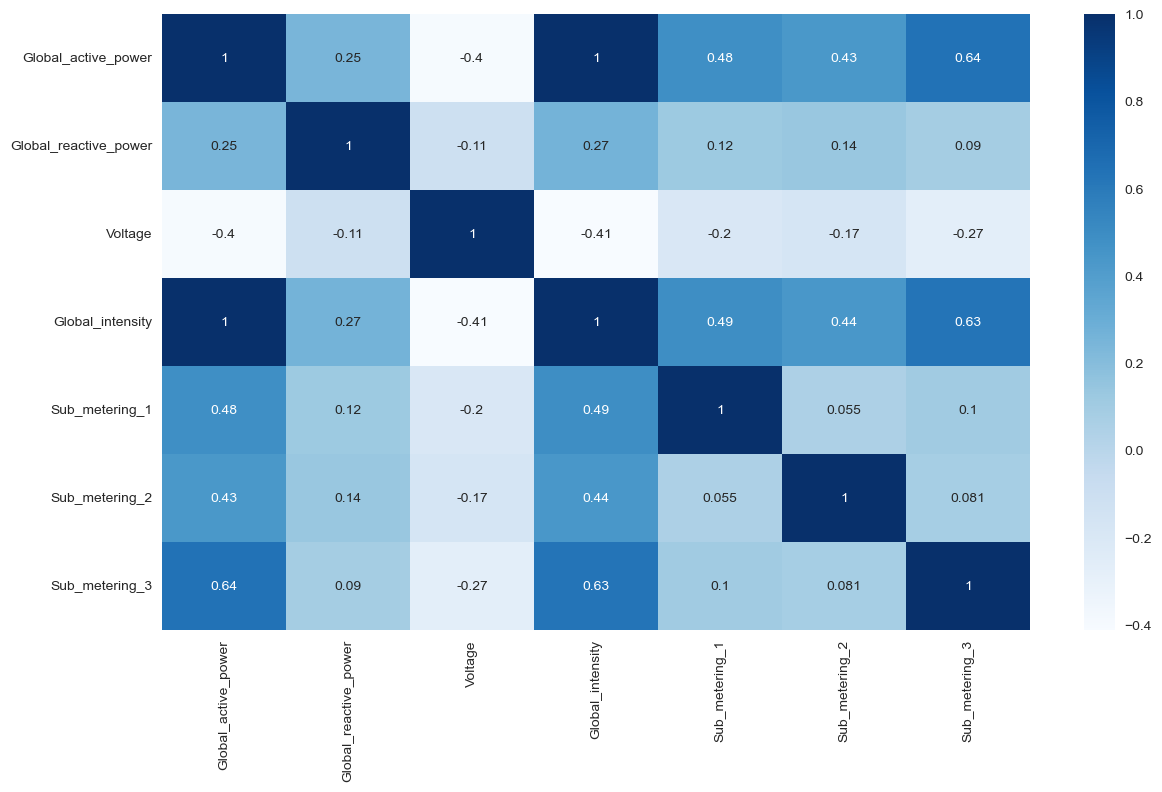

In [25]:
plt.figure(figsize=(14,8))

sns.heatmap(pearsoncorr, annot=True, cmap='Blues');

### ¿Algún gráfico al menos preliminar para mostrar los datos de mayor interés?

> Es factible una gráfica de variables numericas para analizar su distribución y comportamiento

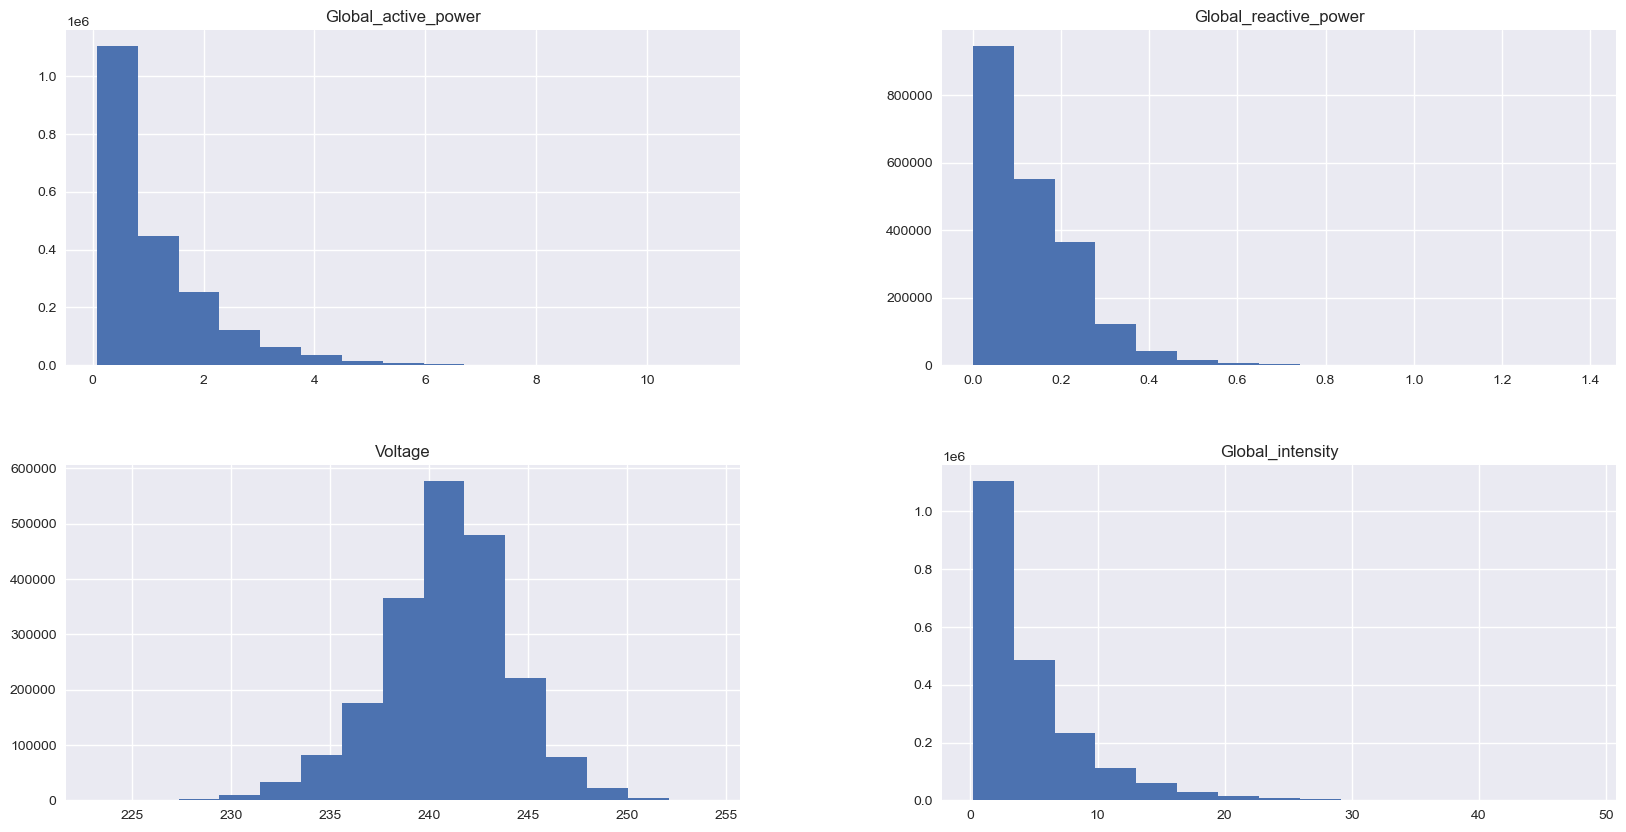

In [26]:
numerical_var = ['Global_active_power', 'Global_reactive_power',
             'Voltage', 'Global_intensity']


df[numerical_var].hist(bins=15, figsize=(20, 10), layout=(2, 2));

> <font color='darkcyan'><b><h2>Isolation Forest</h2></b></font>
>


<p>Basado en el algoritmo del Bosque de aislamiento (Isolation forest) realice los procedimientos necesarios para detectar si hay o no valores anómalos en el dataset.</p>
<ol>
<li>Reserve un 5% de los datos iniciales para pruebas del modelo con datos no vistos.</li>
<li>Utilice del restante el 80% para entrenamiento y el 20% para test</li>
<li>Defina y ajuste el modelo.</li>
<li>Evalue el modelo.</li>
<li>Determine la cantidad de anomalías.</li>
<li>Efectúe una predicción sobre el 5% de datos reservados del inicio.</li>
</ol>

In [27]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [96]:
df_iso = df.copy()

In [97]:
from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

from warnings import filterwarnings

In [98]:
anomaly_inputs = ['Global_active_power',
                  'Global_reactive_power',
                  'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2',
                  'Sub_metering_3']

In [99]:
model_IF = IsolationForest(contamination=float(0.1), random_state=42)

model_IF.fit(df_iso[anomaly_inputs])

df_iso['anomaly_scores'] = model_IF.decision_function(df_iso[anomaly_inputs])

df_iso['anomaly'] = model_IF.predict(df_iso[anomaly_inputs])


D:\04_Miniconda_Install\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
D:\04_Miniconda_Install\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [100]:
df_iso.loc[:, ['Global_active_power',
               'Global_reactive_power','Voltage',
               'Global_intensity','anomaly_scores',
               'anomaly',
               'Sub_metering_1',
               'Sub_metering_2',
               'Sub_metering_3']]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,anomaly_scores,anomaly,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,-0.098692,-1,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,-0.147544,-1,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,-0.159699,-1,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,-0.158489,-1,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,-0.079763,-1,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.100143,1,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.100682,1,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.100664,1,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.103261,1,0.0,0.0,0.0


- Global_active_power

In [101]:
print(df_iso['Global_active_power'].min())
print(df_iso['Global_active_power'].max())

0.076
11.122


- Global_reactive_power

In [102]:
print(df_iso['Global_reactive_power'].min())
print(df_iso['Global_reactive_power'].max())

0.0
1.39


- Voltage

In [103]:
print(df_iso['Voltage'].min())
print(df_iso['Voltage'].max())

223.2
254.15


Global_intensity

In [104]:
print(df_iso['Global_intensity'].min())
print(df_iso['Global_intensity'].max())

0.2
48.4


Sub_metering_1

In [105]:
print(df_iso['Sub_metering_1'].min())
print(df_iso['Sub_metering_1'].max())

0.0
88.0


Sub_metering_2

In [106]:
print(df_iso['Sub_metering_2'].min())
print(df_iso['Sub_metering_2'].max())

0.0
80.0


Sub_metering_3

In [107]:
print(df_iso['Sub_metering_3'].min())
print(df_iso['Sub_metering_3'].max())

0.0
31.0


In [108]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


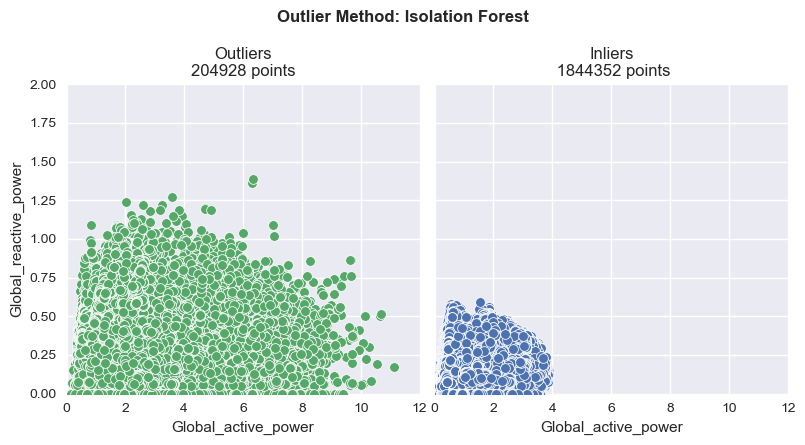

In [109]:
outlier_plot(df_iso, 'Isolation Forest', 'Global_active_power', 'Global_reactive_power', [0, 12], [0, 2]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


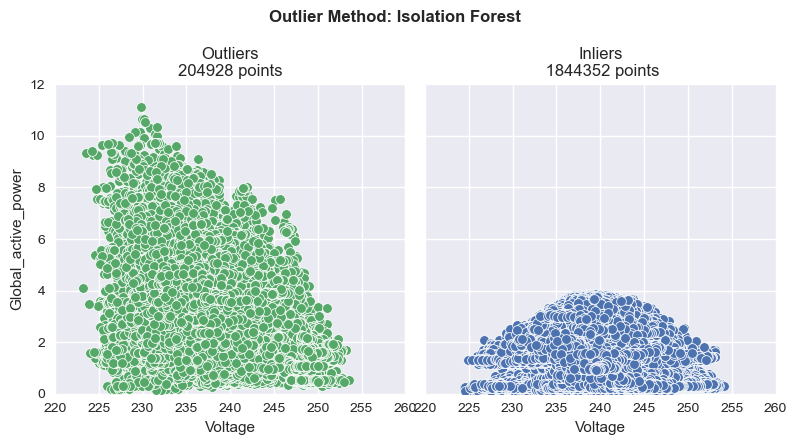

In [110]:
outlier_plot(df_iso, 'Isolation Forest', 'Voltage', 'Global_active_power', [220, 260], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


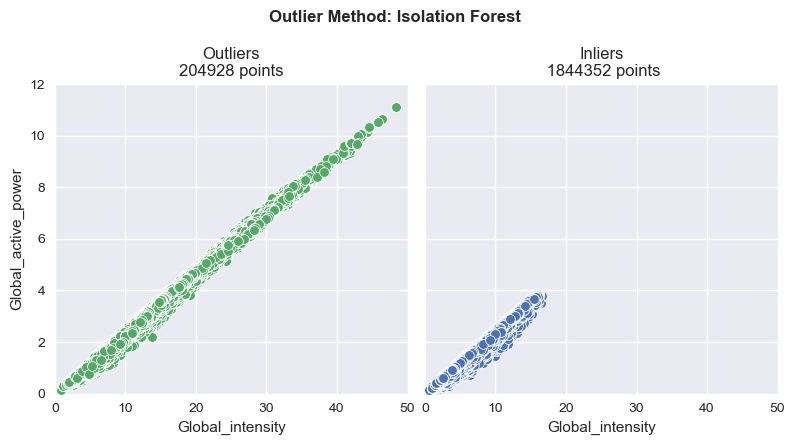

In [111]:
outlier_plot(df_iso, 'Isolation Forest', 'Global_intensity', 'Global_active_power', [0, 50], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


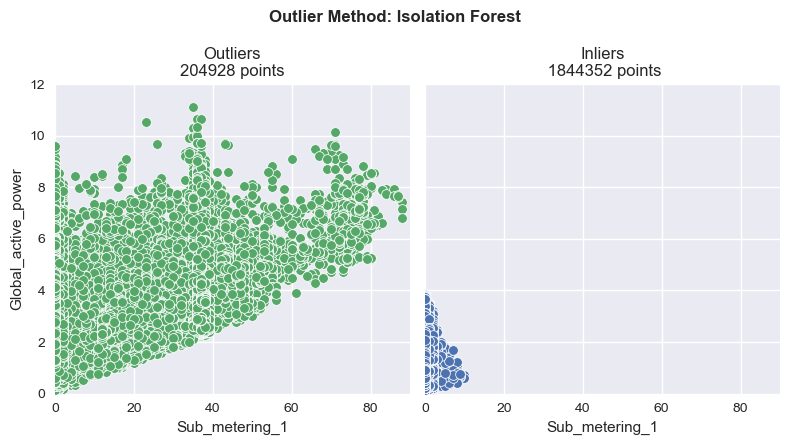

In [112]:
outlier_plot(df_iso, 'Isolation Forest', 'Sub_metering_1', 'Global_active_power', [0, 90], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


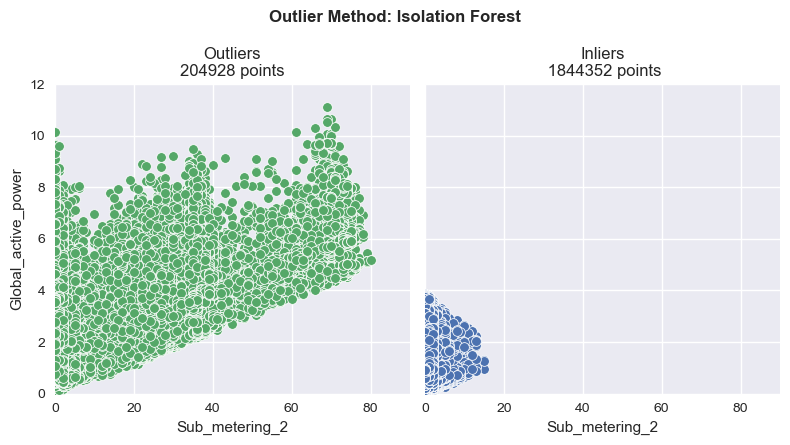

In [113]:
outlier_plot(df_iso, 'Isolation Forest', 'Sub_metering_2', 'Global_active_power', [0, 90], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


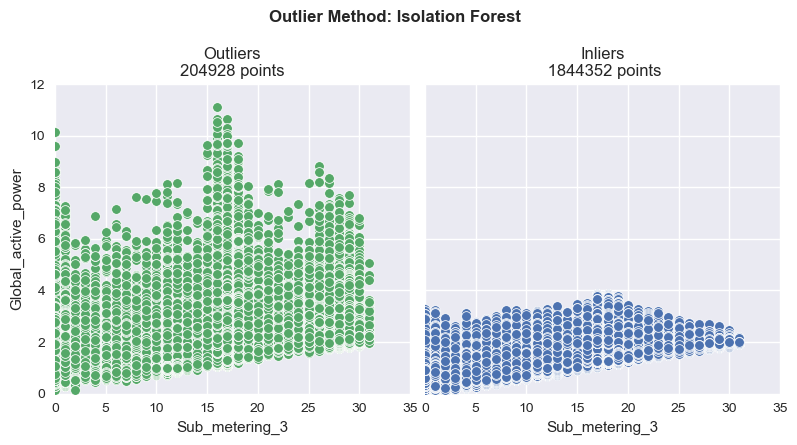

In [114]:
outlier_plot(df_iso, 'Isolation Forest', 'Sub_metering_3', 'Global_active_power', [0, 35], [0, 12]);

In [ ]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_iso, vars=anomaly_inputs, hue='anomaly', palette=palette)

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---